<a href="https://colab.research.google.com/github/k-sharma01/MLA5_KNS/blob/main/MLA5_KNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 5#  
**Kirin Sharma**  

## Standard Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [70]:
# Import voting, bagging, radom forest, and AdaBoost classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

## Imports for Splitting Data and Building Pipeline


In [71]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [73]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [74]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [75]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/landsat_test.csv')

### Statistical and Visual Exploration

Text(0.5, 1.0, 'Landsat Train Data Land Type Counts')

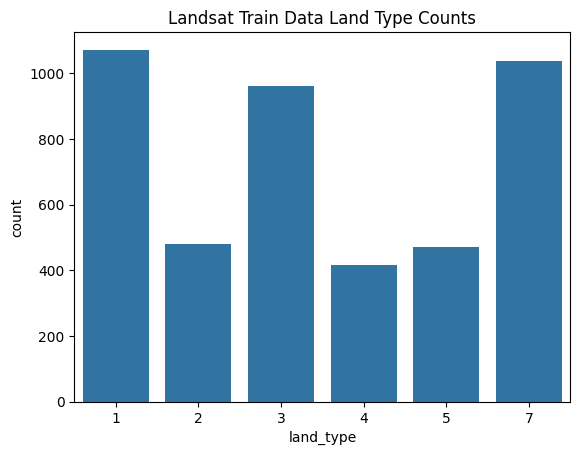

In [76]:
sns.countplot(x='land_type', data=landsat_train)
plt.title("Landsat Train Data Land Type Counts")

Text(0.5, 1.0, 'Landsat Test Data Land Type Counts')

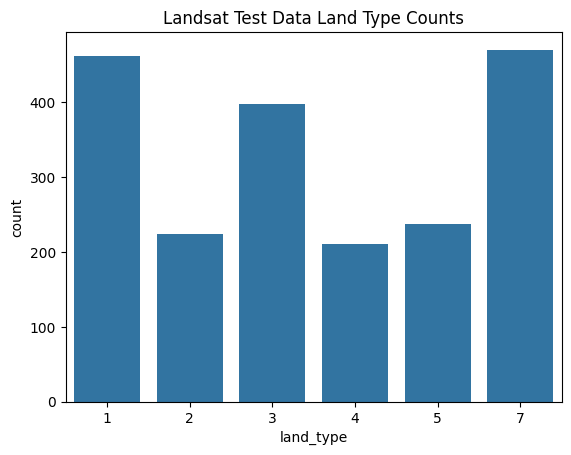

In [77]:
 sns.countplot(x='land_type', data=landsat_test)
plt.title("Landsat Test Data Land Type Counts")

### Splitting Data into Train/Test

In [78]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [79]:
# Create a column transformer to MinMax scale the numerical variables
numerical_columns = X_train.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
for col in numerical_columns:
  X_train[col] = scaler.fit_transform(X_train[[col]])
  X_test[col] = scaler.transform(X_test[[col]])

In [80]:
pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [81]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

### Evaluating Model

In [82]:
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.61      0.68       211
           5       0.93      0.89      0.91       237
           7       0.86      0.90      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



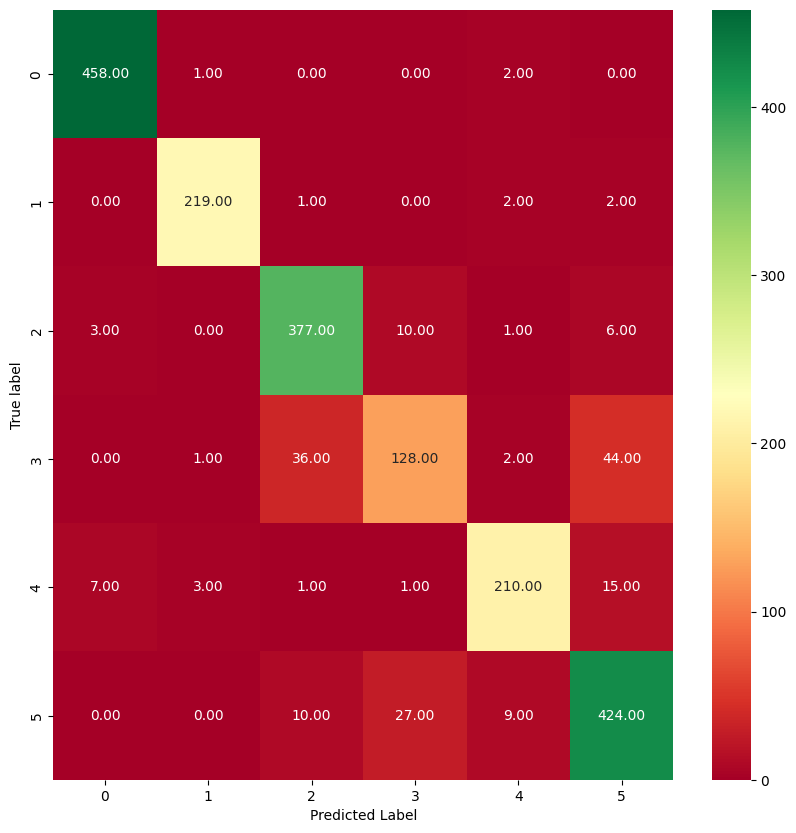

In [83]:
# Use the confusion matrix function to display a heatmap
plot_cm(y_test, y_pred)

### Conclusion
Based on the metrics provided by the classification report, this model is quite accurate in predicting the land type. This conclusion is supported by a relatively high f1 score of 0.91.

## Problem 2

### Building the Pipeline

In [84]:
# Create a pipeline for the same data using a Bagging Classifier
bagging_pipeline = Pipeline([
    ('classifier', BaggingClassifier())
])

### Executing the Model

In [85]:
bagging_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', BaggingClassifier())])

### Evaluating Model

In [86]:
y_pred = bagging_pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       461
           2       0.99      0.97      0.98       224
           3       0.87      0.94      0.90       397
           4       0.70      0.63      0.66       211
           5       0.90      0.86      0.88       237
           7       0.88      0.85      0.86       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.89      0.89      0.89      2000



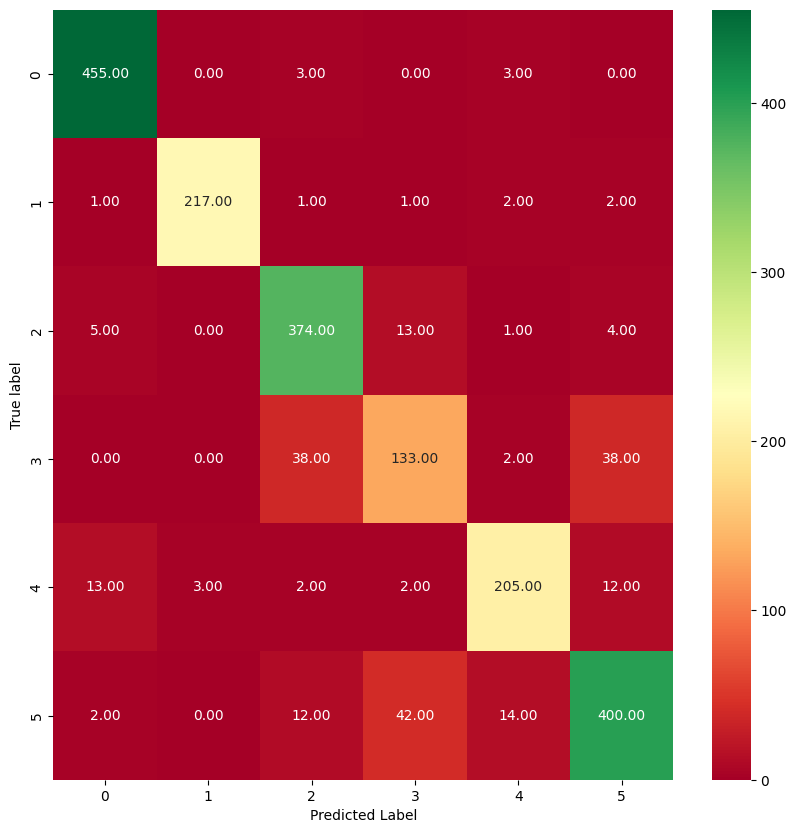

In [87]:
plot_cm(y_test, y_pred)

### Conclusion
This model is also reasonably accurate at predicting the land type, however it is slightly less accurate than the Random Forest model with an f1 score of 0.88.

## Problem 3

### Reading the Data

In [88]:
df = pd.read_csv('/content/gdrive/MyDrive/banknote_authentication.csv')

### Splitting Data into Train/Test

In [89]:
X = df.drop('forgery', axis=1)
y = df['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [90]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [91]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

### Evaluating Model

In [92]:
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



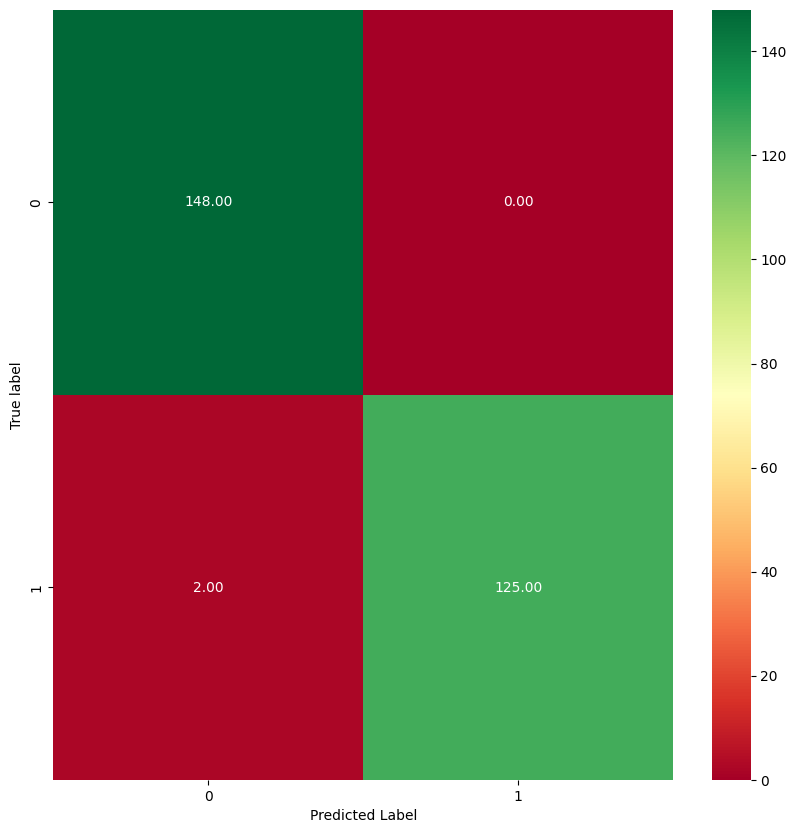

In [93]:
plot_cm(y_test, y_pred)

### Conclusion
This random forest model is incredibly effective at accurately predicting forgeries of banknotes. This is supported by the f1 score of 0.99 and only 3 false predictions in the test dataset.